# Practica 7

#### Descripción de campos importantes: Impago en tarjetas de credito
|Campo|Descripción|
|---|:---|
|ID|ID de cada cliente|
|LIMIT_BAL|monto del crédito otorgado en dólares NT (incluye crédito individual y familiar/complementario)|
|SEX|Gender (1=masculino, 2=femenino)|
|EDUCATION|(1=graduado, 2=universidad, 3=bachillerato, 4=otros, 5=desconocido, 6=desconocido)|
|MARRIAGE|Estado civil (1=casado, 2=soltero, 3=otros)|
|AGE|Edad en años|
|PAY_0|Estado de pago en septiembre de 2005 (-1=pago debido, 1=retraso en el pago de un mes, 2=retraso en el pago de dos meses, 8=retraso en el pago de ocho meses, 9=retraso en el pago de nueve meses o más)|
|PAY_2|Estado de pago en agosto de 2005 (escala igual a la anterior)|
|PAY_3|Estado de pago en julio de 2005 (escala igual a la anterior)|
|PAY_4|Estado de pago en junio de 2005 (escala igual a la anterior)|
|PAY_5|Estado de pago en mayo de 2005 (escala igual a la anterior)|
|PAY_6|Estado de pago en abril de 2005 (escala igual a la anterior)|
|BILL_AMT1|Importe del estado de cuenta en septiembre de 2005 (dólar NT)|
|BILL_AMT2|Importe del estado de cuenta en agosto de 2005 (dólar NT)|
|BILL_AMT3|Importe del estado de cuenta en julio de 2005 (dólar NT)|
|BILL_AMT4|Importe del estado de cuenta en junio de 2005 (dólar NT)|
|BILL_AMT5|Importe del estado de cuenta en mayo de 2005 (dólar NT)|
|BILL_AMT6|Importe del estado de cuenta en abril de 2005 (dólar NT)|
|PAY_AMT1|Importe del pago anterior en septiembre de 2005 (dólar NT)|
|PAY_AMT2|Importe del pago anterior en agosto de 2005 (dólar NT)|
|PAY_AMT3|Importe del pago anterior en julio de 2005 (dólar NT)|
|PAY_AMT4|Importe del pago anterior en junio de 2005 (dólar NT)|
|PAY_AMT5|Importe del pago anterior en mayo de 2005 (dólar NT)|
|PAY_AMT6|Importe del pago anterior en abril de 2005 (dólar NT)|
|default.payment.next.month|Default payment (1=yes, 0=no)|
                                                         
                                                         
                                                         



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot

from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve, roc_auc_score 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

from imblearn.over_sampling import SMOTE

In [2]:
tarjetas = pd.read_csv('default of credit card clients.csv')
tarjetas.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [3]:
tarjetas.rename(columns={'default payment next month':'impago'}, inplace=True)
tarjetas['impago'].value_counts()

0    23364
1     6636
Name: impago, dtype: int64

In [4]:
tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
tarjetas.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
impago       0
dtype: int64

<AxesSubplot:xlabel='impago', ylabel='valores'>

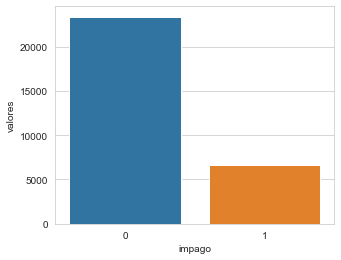

In [6]:
temp = tarjetas["impago"].value_counts()
df = pd.DataFrame({'impago': temp.index,'valores': temp.values})
sb.barplot(x = 'impago', y="valores", data=df)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

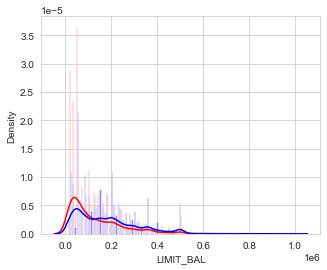

In [7]:
NoImpago = tarjetas.loc[tarjetas['impago'] == 0]["LIMIT_BAL"]
Impago = tarjetas.loc[tarjetas['impago'] == 1]["LIMIT_BAL"]
sb.distplot(Impago,kde=True,bins=200, color="red")
sb.distplot(NoImpago,kde=True,bins=200, color="blue")

In [8]:
tarjetas.SEX[tarjetas.SEX == 1] = 'male'
tarjetas.SEX[tarjetas.SEX == 2] = 'female'
tarjetas.EDUCATION[tarjetas.EDUCATION == 1] = 'gradSchool'
tarjetas.EDUCATION[tarjetas.EDUCATION == 2] = 'university'
tarjetas.EDUCATION[tarjetas.EDUCATION == 3] = 'highSchool'
tarjetas.EDUCATION[tarjetas.EDUCATION == 4] = 'others'
tarjetas.EDUCATION[tarjetas.EDUCATION == 5] = 'unknown'
tarjetas.EDUCATION[tarjetas.EDUCATION == 6] = 'unknown'
tarjetas.MARRIAGE[tarjetas.MARRIAGE == 1] = 'married'
tarjetas.MARRIAGE[tarjetas.MARRIAGE == 2] = 'single'
tarjetas.MARRIAGE[tarjetas.MARRIAGE == 3] = 'others'

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

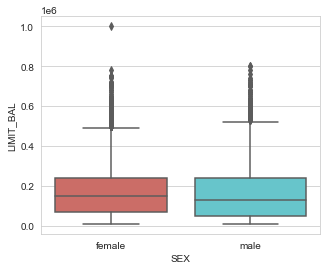

In [9]:
sb.boxplot(x='SEX', y='LIMIT_BAL', data=tarjetas, palette='hls')

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

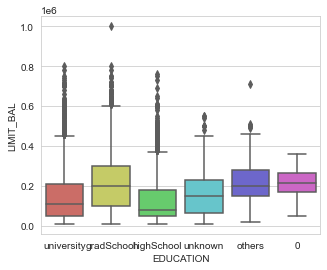

In [10]:
sb.boxplot(x='EDUCATION', y='LIMIT_BAL', data=tarjetas, palette='hls')

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

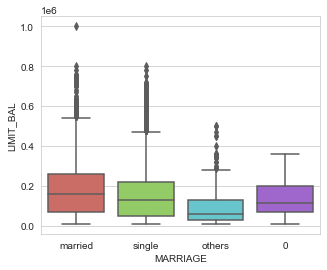

In [11]:
sb.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=tarjetas, palette='hls')

In [12]:
pd.crosstab(index = tarjetas["EDUCATION"], columns=tarjetas["impago"])

impago,0,1
EDUCATION,,
0,14,0
gradSchool,8549,2036
highSchool,3680,1237
others,116,7
university,10700,3330
unknown,305,26


In [13]:
pd.crosstab(index = tarjetas["MARRIAGE"], columns=tarjetas["impago"])

impago,0,1
MARRIAGE,,
0,49,5
married,10453,3206
others,239,84
single,12623,3341


In [14]:
pd.crosstab(index = tarjetas["SEX"], columns=tarjetas["impago"])

impago,0,1
SEX,,
female,14349,3763
male,9015,2873


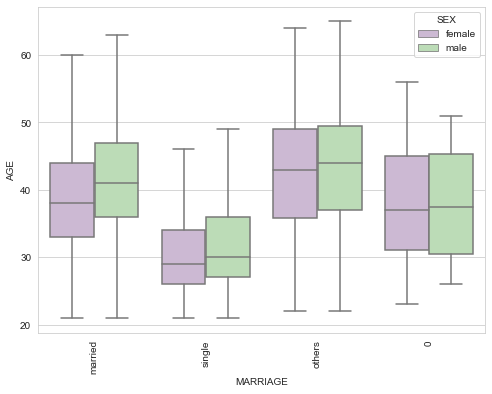

In [15]:
def boxplot_variation(data,feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sb.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();
boxplot_variation(tarjetas,'MARRIAGE','AGE', 'SEX',8)

In [16]:
del tarjetas['ID']

In [17]:
nombres = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
         'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
escalador = preprocessing.StandardScaler()
escalado = escalador.fit_transform(tarjetas[nombres])
escalado = pd.DataFrame(escalado, columns=nombres)


In [18]:
tarjetas = tarjetas.drop(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
         'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1) 
tarjetas.shape

(30000, 10)

In [19]:
tarjetas = pd.concat([tarjetas, escalado], axis = 1)
tarjetas.head(2)

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,impago,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,female,university,married,2,2,-1,-1,-2,-2,1,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,female,university,single,-1,2,0,0,0,2,1,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878


In [20]:
categoricas = ['SEX', 'EDUCATION', 'MARRIAGE']
tarjetas = pd.get_dummies(tarjetas, prefix_sep="_", columns=categoricas)
tarjetas.head(2)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,impago,LIMIT_BAL,AGE,BILL_AMT1,...,EDUCATION_0,EDUCATION_gradSchool,EDUCATION_highSchool,EDUCATION_others,EDUCATION_university,EDUCATION_unknown,MARRIAGE_0,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,2,2,-1,-1,-2,-2,1,-1.136720,-1.246020,-0.642501,...,0,0,0,0,1,0,0,1,0,0
1,-1,2,0,0,0,2,1,-0.365981,-1.029047,-0.659219,...,0,0,0,0,1,0,0,0,0,1


In [21]:
tarjetas.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'impago',
       'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_0', 'EDUCATION_gradSchool', 'EDUCATION_highSchool',
       'EDUCATION_others', 'EDUCATION_university', 'EDUCATION_unknown',
       'MARRIAGE_0', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [22]:
y = tarjetas.loc[:, tarjetas.columns == 'impago']
X = tarjetas.loc[:, tarjetas.columns != 'impago']

###  SMOTE

In [23]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
columns = X_train.columns

In [24]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['impago'])
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['impago']==0]))
print("Number of subscription",len(os_data_y[os_data_y['impago']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['impago']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['impago']==1])/len(os_data_X))

length of oversampled data is  34978
Number of no subscription in oversampled data 17489
Number of subscription 17489
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [25]:
os_data_X.shape

(34978, 32)

In [26]:
os_data_y.shape

(34978, 1)

In [27]:
logmodel = LogisticRegression()
logmodel.fit(os_data_X,os_data_y)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5875
           1       0.44      0.53      0.48      1625

    accuracy                           0.75      7500
   macro avg       0.65      0.67      0.66      7500
weighted avg       0.77      0.75      0.76      7500



In [28]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [29]:
predictions.shape

(7500,)

In [30]:
auc = roc_auc_score(y_test, predictions)  
print('AUC: %.2f' % auc)  

AUC: 0.67


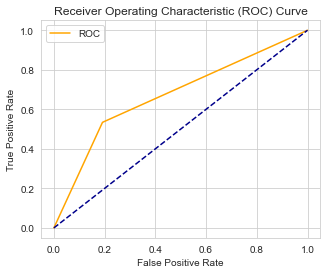

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)  
plot_roc_curve(fpr, tpr)

In [32]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,predictions)

#confusion_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[4749 1126]
 [ 757  868]]


In [33]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 53.41538461538462%


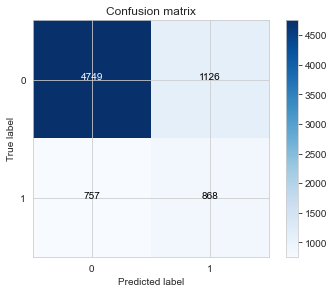

In [34]:
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')